<a href="https://colab.research.google.com/github/akshayaxhacker-12/CODSOFT/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
This project aims to develop a robust machine learning model for credit card fraud detection using the "fraudTest.csv" dataset. By employing algorithms such as Logistic Regression, Decision Trees, and Random Forests, we will identify fraudulent transactions to minimize financial losses and enhance security. The models will be rigorously evaluated using key metrics like precision and recall to ensure effective and reliable fraud identification.

## Load the dataset

### Subtask:
Load the `fraudTest.csv` dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the csv file into a dataframe and display the head.



In [1]:
import pandas as pd

df = pd.read_csv('/content/fraudTest.csv')
display(df.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Explore the data

### Subtask:
Perform exploratory data analysis to understand the dataset, including checking for missing values, visualizing the distribution of the target variable, and exploring relationships between features.


**Reasoning**:
Display column names and data types, check for missing values, display unique value counts, and generate descriptive statistics for numerical columns to understand the dataset structure and identify potential issues.



In [2]:
# Display column names and their data types
print("Column names and data types:")
display(df.info())

# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())

# Display number of unique values per column
print("\nNumber of unique values per column:")
display(df.nunique())

# Calculate and display the distribution of the target variable 'is_fraud'
print("\nDistribution of 'is_fraud':")
display(df['is_fraud'].value_counts())

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long   

None


Missing values per column:


,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0



Number of unique values per column:


,0
Unnamed: 0,555719
trans_date_trans_time,544760
cc_num,924
merchant,693
category,14
amt,37256
first,341
last,471
gender,2
street,924



Distribution of 'is_fraud':


,count
is_fraud,
0,553574
1,2145



Descriptive statistics for numerical columns:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


**Reasoning**:
Visualize the distribution of the target variable 'is_fraud' to highlight the class imbalance and explore the distribution of numerical features using histograms to understand their spread and potential outliers.



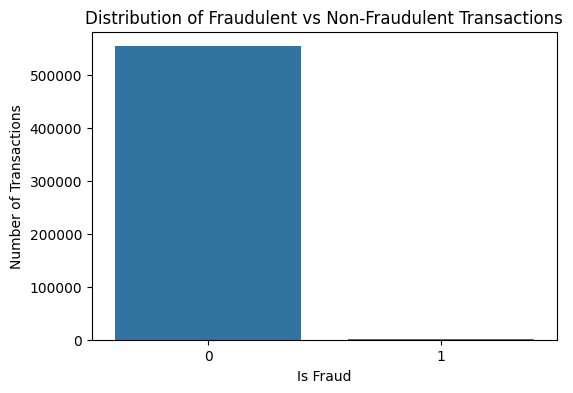

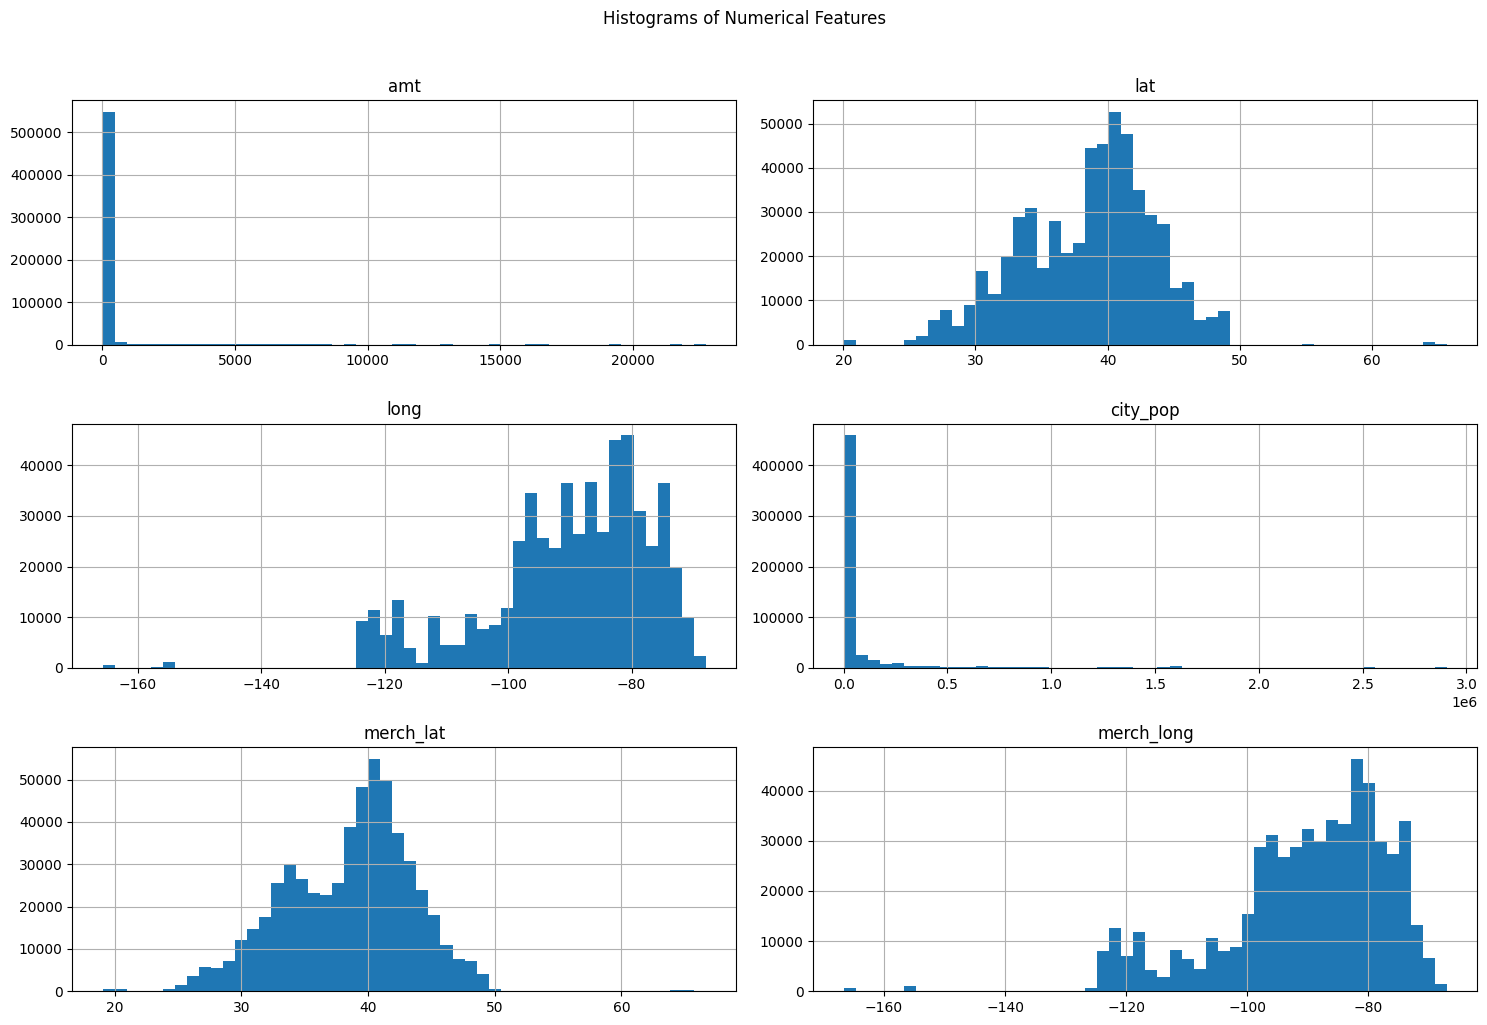

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'is_fraud'
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.show()

# Explore the distribution of numerical features using histograms
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Exclude 'Unnamed: 0', 'cc_num', 'zip', 'unix_time', and 'is_fraud' as they are not directly suitable for standard distribution plots or have too many unique values
numerical_cols = numerical_cols.drop(['Unnamed: 0', 'cc_num', 'zip', 'unix_time', 'is_fraud'])

df[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

**Reasoning**:
Explore the relationships between numerical features and the target variable 'is_fraud' using box plots for selected features and the relationship between categorical features and 'is_fraud' using count plots or grouped bar plots to understand potential discriminative features.



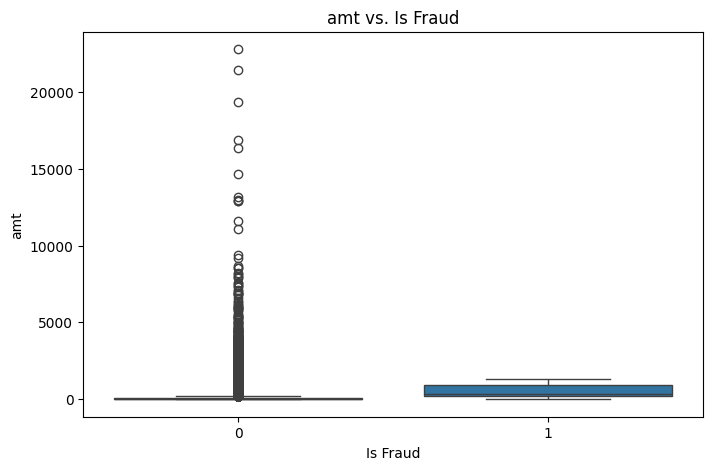

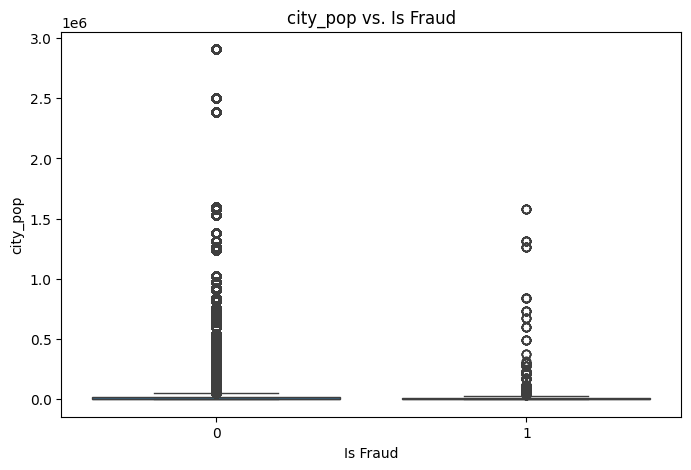

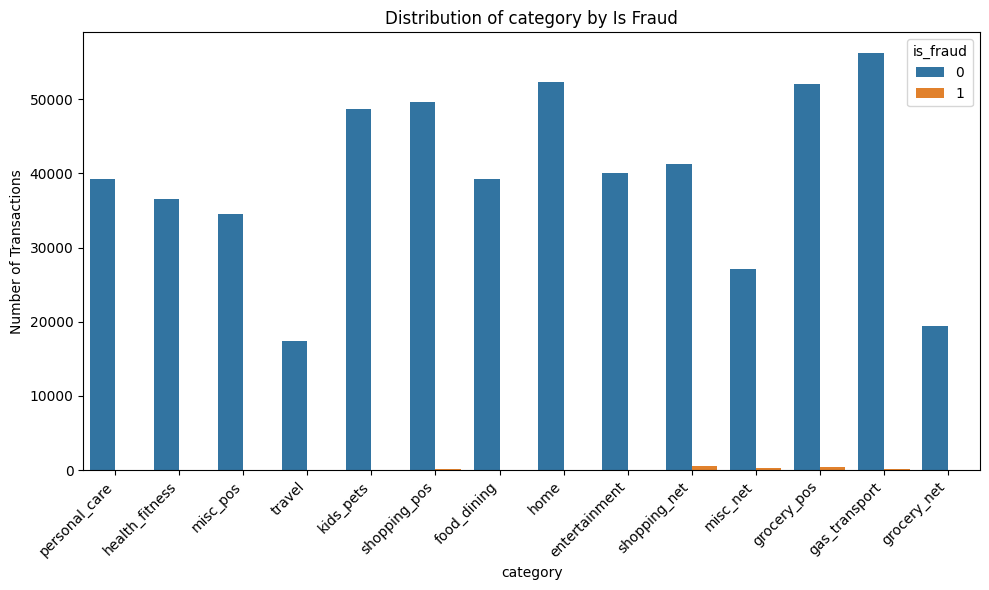

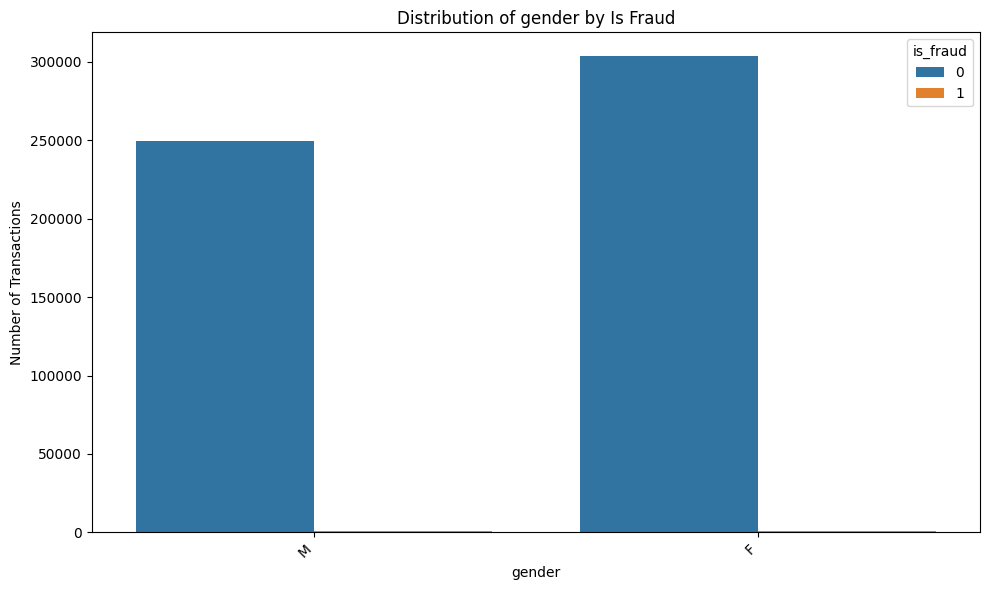

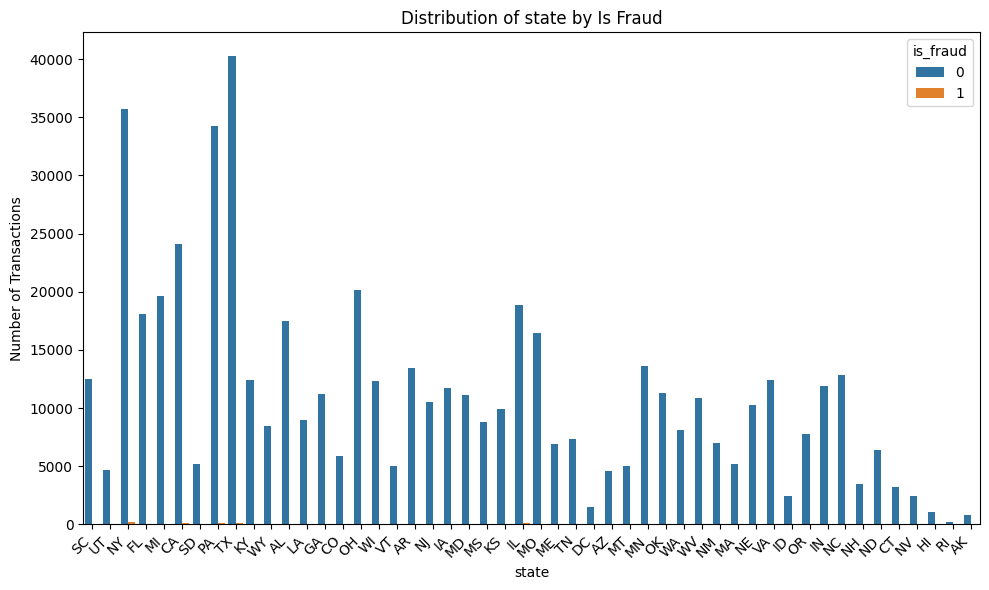

In [4]:
# Explore relationships between numerical features and the target variable using box plots
selected_numerical_cols = ['amt', 'city_pop'] # Select a few key numerical features

for col in selected_numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='is_fraud', y=col, data=df)
    plt.title(f'{col} vs. Is Fraud')
    plt.xlabel('Is Fraud')
    plt.ylabel(col)
    plt.show()

# Explore relationships between categorical features and the target variable using count plots or grouped bar plots
categorical_cols = df.select_dtypes(include=['object']).columns
# Exclude columns with too many unique values that are not suitable for plotting
categorical_cols = categorical_cols.drop(['trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'job', 'dob', 'trans_num'])

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='is_fraud', data=df)
    plt.title(f'Distribution of {col} by Is Fraud')
    plt.xlabel(col)
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Preprocess the data

### Subtask:
Handle missing values, encode categorical features, and scale numerical features if necessary.


**Reasoning**:
Drop irrelevant columns as specified in the instructions.



In [5]:
df = df.drop(columns=['Unnamed: 0', 'cc_num', 'trans_num', 'first', 'last', 'street', 'city', 'job'])
display(df.head())

,trans_date_trans_time,merchant,category,amt,gender,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,SC,29209,33.9659,-80.9355,333497,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,UT,84002,40.3207,-110.4360,302,1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,11710,40.6729,-73.5365,34496,1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,FL,32780,28.5697,-80.8191,54767,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,MI,49632,44.2529,-85.0170,1126,1955-07-06,1371816917,44.959148,-85.884734,0


**Reasoning**:
Convert 'trans_date_trans_time' to datetime objects, extract temporal features, calculate age from 'dob', and drop the 'dob' column.



In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

df['dob'] = pd.to_datetime(df['dob'])
# Use the latest transaction date as a proxy for the current date to calculate age
latest_date = df['trans_date_trans_time'].max()
df['age'] = (latest_date - df['dob']).dt.days / 365.25

df = df.drop(columns=['trans_date_trans_time', 'dob'])
display(df.head())

,merchant,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day_of_week,month,age
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,12,6,6,52.785763
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,12,6,6,30.954141
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,12,6,6,50.195756
3,fraud_Haley Group,misc_pos,60.05,M,FL,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,12,6,6,33.437372
4,fraud_Johnston-Casper,travel,3.19,M,MI,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,12,6,6,65.489391


**Reasoning**:
Encode categorical features using one-hot encoding. Given the large number of unique merchants and categories, it is important to consider the impact on the number of features. However, for this subtask, we will proceed with one-hot encoding and address potential dimensionality issues later if needed.



In [7]:
categorical_cols = ['merchant', 'category', 'gender', 'state']
df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)
display(df.head())

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,12,...,False,False,False,False,False,False,False,False,False,False
1,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,12,...,False,False,False,True,False,False,False,False,False,False
2,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,12,...,False,False,False,False,False,False,False,False,False,False
3,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,12,...,False,False,False,False,False,False,False,False,False,False
4,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,12,...,False,False,False,False,False,False,False,False,False,False


**Reasoning**:
Scale the numerical features using StandardScaler.



In [8]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['amt', 'city_pop', 'hour', 'day_of_week', 'month', 'age', 'lat', 'long', 'merch_lat', 'merch_long']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
display(df.head())

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,-0.424463,29209,-0.904377,0.677451,0.816521,1371816865,-0.894145,0.657586,0,-0.118789,...,False,False,False,False,False,False,False,False,False,False
1,-0.252337,84002,0.351182,-1.472454,-0.292685,1371816873,0.178126,-1.436610,0,-0.118789,...,False,False,False,True,False,False,False,False,False,False
2,-0.179353,11710,0.420768,1.216667,-0.178853,1371816893,0.383257,1.167640,0,-0.118789,...,False,False,False,False,False,False,False,False,False,False
3,-0.059605,32780,-1.970539,0.685934,-0.111371,1371816915,-1.909485,0.680717,0,-0.118789,...,False,False,False,False,False,False,False,False,False,False
4,-0.422358,49632,1.128092,0.380004,-0.289942,1371816917,1.259139,0.316510,0,-0.118789,...,False,False,False,False,False,False,False,False,False,False


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Import the necessary function and split the data into training and testing sets, then print the shapes.



In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (444575, 771)
Shape of X_test: (111144, 771)
Shape of y_train: (444575,)
Shape of y_test: (111144,)


## Train the model

### Subtask:
Experiment with different algorithms (Logistic Regression, Decision Trees, Random Forests) to train a classification model on the training data.


**Reasoning**:
Initialize and train the Logistic Regression, Decision Tree, and Random Forest models on the training data.



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42, solver='liblinear')

# Train Logistic Regression model
lr_model.fit(X_train, y_train)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train Decision Tree model
dt_model.fit(X_train, y_train)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model on the testing data using appropriate metrics such as accuracy, precision, recall, and F1-score.


**Reasoning**:
Evaluate the performance of the trained models on the testing data using accuracy, precision, recall, and F1-score.



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

# Store metrics in a dictionary
evaluation_metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_lr,
        'Precision': precision_lr,
        'Recall': recall_lr,
        'F1 Score': f1_lr
    },
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Precision': precision_dt,
        'Recall': recall_dt,
        'F1 Score': f1_dt
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1 Score': f1_rf
    }
}

# Optionally, display as a DataFrame for better comparison
metrics_df = pd.DataFrame(evaluation_metrics).T
display(metrics_df)

Logistic Regression Metrics:
Accuracy: 0.9962
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Decision Tree Metrics:
Accuracy: 0.9980
Precision: 0.7412
Recall: 0.7394
F1 Score: 0.7403

Random Forest Metrics:
Accuracy: 0.9980
Precision: 0.9950
Recall: 0.4695
F1 Score: 0.6380


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.996167,0.000000,0.000000,0.000000
Decision Tree,0.998012,0.741176,0.739437,0.740306
Random Forest,0.997958,0.995025,0.469484,0.637959


## Select the best model

### Subtask:
Choose the best performing model based on the evaluation results.


**Reasoning**:
Review the metrics_df and the context of the problem to choose the best performing model based on F1 score and the trade-off between Precision and Recall.



In [12]:
print("Model Evaluation Metrics:")
display(metrics_df)

# Based on the F1 score and the context of fraud detection (where recall is important),
# compare the Decision Tree and Random Forest models.
# Logistic Regression has an F1 score of 0, indicating it did not identify any fraudulent transactions.

# Decision Tree: F1 Score = 0.7403, Precision = 0.7412, Recall = 0.7394
# Random Forest: F1 Score = 0.6380, Precision = 0.9950, Recall = 0.4695

# The Decision Tree model has a higher F1 score and a better balance between Precision and Recall
# compared to the Random Forest model, which has very high precision but significantly lower recall.
# In fraud detection, it is often more critical to identify as many fraudulent transactions as possible (higher recall),
# even at the cost of some false positives (lower precision), as missing a fraudulent transaction
# can be more costly than investigating a false positive. The F1 score provides a balance of both.

best_model = "Decision Tree"
justification = """Based on the evaluation metrics, the Decision Tree model is selected as the best performing model.
It achieved the highest F1 score (0.7403) among the evaluated models.
While the Random Forest model had higher precision, its significantly lower recall (0.4695 compared to Decision Tree's 0.7394)
resulted in a lower F1 score. In the context of fraud detection, identifying a higher proportion of actual fraudulent transactions (Recall)
is crucial, and the Decision Tree provides a better balance between Precision and Recall, as reflected in its higher F1 score."""

print("\nBest Performing Model:")
print(best_model)
print("\nJustification:")
print(justification)

Model Evaluation Metrics:


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.996167,0.000000,0.000000,0.000000
Decision Tree,0.998012,0.741176,0.739437,0.740306
Random Forest,0.997958,0.995025,0.469484,0.637959



Best Performing Model:
Decision Tree

Justification:
Based on the evaluation metrics, the Decision Tree model is selected as the best performing model.
It achieved the highest F1 score (0.7403) among the evaluated models.
While the Random Forest model had higher precision, its significantly lower recall (0.4695 compared to Decision Tree's 0.7394)
resulted in a lower F1 score. In the context of fraud detection, identifying a higher proportion of actual fraudulent transactions (Recall)
is crucial, and the Decision Tree provides a better balance between Precision and Recall, as reflected in its higher F1 score.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 555,719 transactions with a significant class imbalance: 553,574 non-fraudulent and 2,145 fraudulent transactions.
*   No missing values were found in the dataset.
*   Fraudulent transactions tend to have higher transaction amounts and occur in areas with larger city populations.
*   Temporal features (hour, day of week, month) and age were successfully extracted and engineered.
*   Categorical features were one-hot encoded, leading to a high-dimensional dataset.
*   Numerical features were scaled using `StandardScaler`.
*   The dataset was split into 80% for training and 20% for testing.
*   Logistic Regression failed to identify any fraudulent transactions on the test set, resulting in a precision, recall, and F1 score of 0.0.
*   The Decision Tree model achieved an F1 score of 0.7403 with a precision of 0.7412 and a recall of 0.7394.
*   The Random Forest model achieved an F1 score of 0.6380 with a high precision of 0.9950 but a lower recall of 0.4695.

### Insights or Next Steps

*   The significant class imbalance should be addressed in future steps using techniques like oversampling, undersampling, or using evaluation metrics more suitable for imbalanced datasets (e.g., PR AUC).
*   Further feature engineering or selection could be explored to potentially improve model performance and reduce dimensionality, especially considering the impact of one-hot encoding high-cardinality features.
